In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

1.0


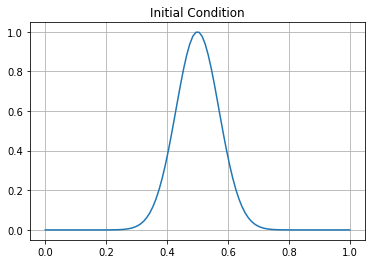

In [24]:
#Instead of calculating these intervals, we define them directly. 
#This is crucial because numpy is bad at numerical computation. (see the comments when we calculate eps)
deltaT = 0.0001 
deltaX = 0.01

tMin = 0
tMax = 1

#This is the total number of frames. Since we are using very small deltaT, we must be careful when animating.
#tMax can be as long as we want, but the render time will increase accordingly too.
#For example, the animation code below uses only 200 frames while this value of tMax = 1 allows up to Nt = 10000 frames.
Nt = int(tMax/deltaT)
Nx = int(xMax/deltaX)

xMin = 0
xMax = 1

t = np.linspace(tMin, tMax, num=Nt, endpoint=True)
x = np.linspace(xMin, xMax, num=Nx, endpoint=True)

# Compute Secondary variables

c = 100
eps = (deltaT*c / deltaX)**2

print(eps) #because of maths, error propagates if eps>1. Make sure dT,dX,c do not produce eps>1


U = np.zeros((Nt, Nx), dtype=np.longdouble) 

# Compute Initial values
U[0, :] = np.exp(-100. * (x - 0.5)**2) # this is U(j=0). We will compute U(j>0) later in the iteration below.


# Plot Initial Condition
plt.plot(x, U[0, :])
plt.grid()
plt.title("Initial Condition")
plt.show()

# Iterate to the matrix u
for j in range(Nt-1):
    for i in range(Nx):
        if i ==0 or i == Nx-1: #boundary conditions takes first priority
            U[j+1][i] = 0
        elif j ==0: #we calculate U(j=1) from U(j=0).
            U_ip1 = U[0][i+1]
            U_im1 = U[0][i-1]
            U_ij = U[0][i]
            U[j+1][i] = 0.5*eps*(U_ip1 + U_im1) + (1. - eps)*U_ij+ deltaT * U[0,i]
        else: #we then calculate U(j+1) from U(j)
            U_ip1 = U[j][i+1]
            U_im1 = U[j][i-1]
            U_ij = U[j][i]
            U_jm1 = U[j-1][i]

            U[j+1][i] = eps*(U_ip1 + U_im1) + 2.*(1. - eps)*U_ij - U_jm1

<function matplotlib.pyplot.show(close=None, block=None)>

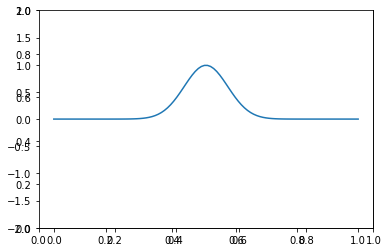

In [25]:
fig, ax = plt.subplots()
ax = plt.axes(ylim=(-2, 2))
line, = ax.plot(x,U[0,:])


def animate(i):
    line.set_data(x,U[i,:])
    return line
#again, the maximum number of frames is Nt, which is 10000 in this case, but the render time becomes too long, 200 frames is enough.
anim = animation.FuncAnimation(fig, animate, frames=200, repeat=False) 
anim.save('wave-refactor.mp4', fps = 30)
plt.show